In [345]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model, metrics, tree, ensemble, preprocessing
import matplotlib.pyplot as plt

In [4]:
round(((4.4**2+3.8**2+4.8**2+4.0**2+3.4**2+4.2**2+5.2**2)/7 - ((4.4+3.8+4.8+4.0+3.4+4.2+5.2)/7)**2), 3)

0.317

In [98]:
data = pd.DataFrame([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
round((data[0]**2).sum()/7-((data[0].sum()/7)**2), 3)

0.317

In [114]:
data = pd.read_csv('data/wineQualityReds.csv', sep=',', index_col=0)
data['label'] = data.quality.apply(lambda x: 1 if x>=6 else 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 174.9 KB


In [100]:
data.label.value_counts()

label
1    855
0    744
Name: count, dtype: int64

In [101]:
X = data.drop(['label', 'quality'], axis=1)
y = data.label
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
col_names = list(X_train.columns)
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [105]:
lc = linear_model.LogisticRegression()
lc.fit(X_train_scaled, y_train)
y_pred_lc = lc.predict(X_test_scaled)
print(f'F1 линейной регрессии:{round(metrics.f1_score(y_test, y_pred_lr), 3)}')

F1 линейной регрессии:0.739


In [104]:
dt = tree.DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print(f'F1 линейной регрессии:{round(metrics.f1_score(y_test, y_pred_dt), 3)}')

F1 линейной регрессии:0.783


In [75]:
bag = ensemble.BaggingClassifier(estimator=dt, n_estimators=1500, random_state=42)
bag.fit(X_train_scaled, y_train)
y_pred_bag = bag.predict(X_test_scaled)
print(f'F1 линейной регрессии:{round(metrics.f1_score(y_test, y_pred_bag), 3)}')


F1 линейной регрессии:0.819


## Случайный лес

In [312]:
data = pd.read_csv('data/boston (1).csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crim_rate       506 non-null    object
 1   zn              506 non-null    object
 2   business        506 non-null    object
 3   river           506 non-null    int64 
 4   nit_oxiden      506 non-null    object
 5   rooms           506 non-null    object
 6   age             506 non-null    object
 7   dist            506 non-null    object
 8   highways_index  506 non-null    int64 
 9   tax             506 non-null    int64 
 10  pup_per_teaс    506 non-null    object
 11  lower           506 non-null    object
 12  target          506 non-null    object
dtypes: int64(3), object(10)
memory usage: 51.5+ KB


In [313]:
cols = ['crim_rate', 'zn', 'business', 'nit_oxiden', 'rooms', 'age', 'dist', 'pup_per_teaс', 'lower', 'target']    
for i in cols:
    data[i] = data[i].apply(lambda x: x.replace(',', '.'))
    data[i] = data[i].astype('float')

In [314]:
X = data.drop('target', axis=1)
y = data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=13)
y_train.mean().round(2)

22.77

In [315]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'MAE: {round(metrics.mean_absolute_error(y_test, y_pred_lr), 2)}')

MAE: 3.72


In [316]:
dt = tree.DecisionTreeRegressor(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'MAE: {round(metrics.mean_absolute_error(y_test, y_pred_dt), 2)}')

MAE: 2.84


In [317]:
num = [3, 10, 100, 500]
for i in num:
    rf = ensemble.RandomForestRegressor(n_estimators=i, random_state=13)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(f'MAE {i}: {round(metrics.mean_absolute_error(y_test, y_pred_rf), 2)}')

MAE 3: 2.93
MAE 10: 2.47
MAE 100: 2.26
MAE 500: 2.24


### Practic

In [318]:
data = pd.read_csv('data/weatherAUS.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [319]:
data.isnull().sum().sum()

343248

In [320]:
# процент пропусков по столбцам
round(data.isna().sum() / len(data), 3)

Date             0.000
Location         0.000
MinTemp          0.010
MaxTemp          0.009
Rainfall         0.022
Evaporation      0.432
Sunshine         0.480
WindGustDir      0.071
WindGustSpeed    0.071
WindDir9am       0.073
WindDir3pm       0.029
WindSpeed9am     0.012
WindSpeed3pm     0.021
Humidity9am      0.018
Humidity3pm      0.031
Pressure9am      0.104
Pressure3pm      0.103
Cloud9am         0.384
Cloud3pm         0.408
Temp9am          0.012
Temp3pm          0.025
RainToday        0.022
RainTomorrow     0.022
dtype: float64

In [321]:
count_drop = 0
for i in data.columns:
    if data[i].isnull().sum()/145460>0.4:
        data.drop(i, axis=1, inplace=True)
        count_drop+=1
print(count_drop)

3


In [322]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainTomorrow = data.RainTomorrow.map({'No': 0, 'Yes': 1})

In [323]:
data.RainToday.mean().round(2)

0.22

In [324]:
data.Date = pd.to_datetime(data.Date)
data['Month'] = data.Date.dt.month
data.drop('Date', axis=1, inplace=True)
data.groupby('Month')['RainToday'].mean().round(3)

Month
1     0.189
2     0.207
3     0.217
4     0.217
5     0.222
6     0.264
7     0.271
8     0.253
9     0.229
10    0.197
11    0.211
12    0.213
Name: RainToday, dtype: float64

In [325]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data = pd.get_dummies(data, columns=categoricals)
data.shape

(145460, 124)

In [326]:
data.dropna(inplace=True)

In [327]:
X = data.drop('RainTomorrow', axis=1)
y = data.RainTomorrow
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31)
y_test.mean().round(2)

0.23

In [328]:
target = X_train['MinTemp'].values
np.random.seed(31)
ind = np.random.randint(0, len(target), (1000, len(target)))
val = target[ind]
val_mean = []
val_mean = [i.mean() for i in val]
np.std(val_mean)

0.02879072820657669

In [329]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

In [332]:
col_names = list(X_train.columns)
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [334]:
lr = linear_model.LogisticRegression().fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print(f'Roc_auc: {round(metrics.roc_auc_score(y_test, y_pred), 2)}')

Roc_auc: 0.74


In [335]:
params = {'max_leaf_nodes': list(range(2, 10)),
          'min_samples_split': [2, 3, 4],
          'max_depth': [5,7,9,11]
}
gs = model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state=42),
                                  params, cv=3
).fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


In [338]:
dt = tree.DecisionTreeClassifier(**gs.best_params_).fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'Roc_auc: {round(metrics.roc_auc_score(y_test, y_pred), 2)}')

Roc_auc: 0.7


In [339]:
rf = ensemble.RandomForestClassifier(n_estimators=1000,
                                     random_state=31).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Roc_auc: {round(metrics.roc_auc_score(y_test, y_pred), 2)}')

Roc_auc: 0.73


In [340]:
params = {'max_features': [ 4, 5, 6, 7],
          'min_samples_leaf': [3, 5, 7, 9, 11],
          'max_depth': [5, 10, 15]
}
gs = model_selection.GridSearchCV(ensemble.RandomForestClassifier(n_estimators=100,
                                                                  random_state=31
                                  ), params, cv=3
).fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}


In [348]:
rf = ensemble.RandomForestClassifier(**gs.best_params_, random_state=31).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Roc_auc: {round(metrics.roc_auc_score(y_test, y_pred), 2)}')

Roc_auc: 0.7


<Axes: >

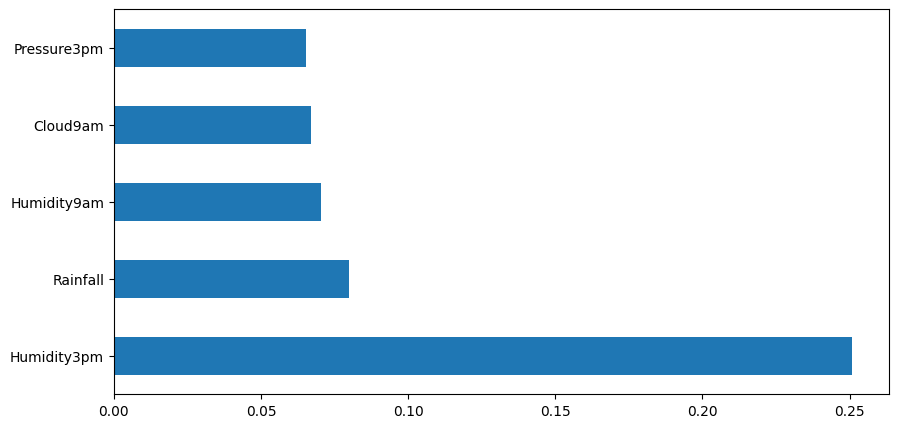

In [349]:
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')